Step 1 :-  importing libraries 

In [1]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as 
tf.__version__


'2.10.0'

Step 2 :- loading the mnist dataset from keras and spliting that dataset into train and test data

In [2]:

train =  keras.datasets.mnist  
(X_train, y_train),(X_test,y_test) = train.load_data()


Step 3 :- Exploring the data and we get /see following conclusion

x_train:- uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train:- uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test:- uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [3]:

X_train.shape , y_train.shape , X_test.shape , y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

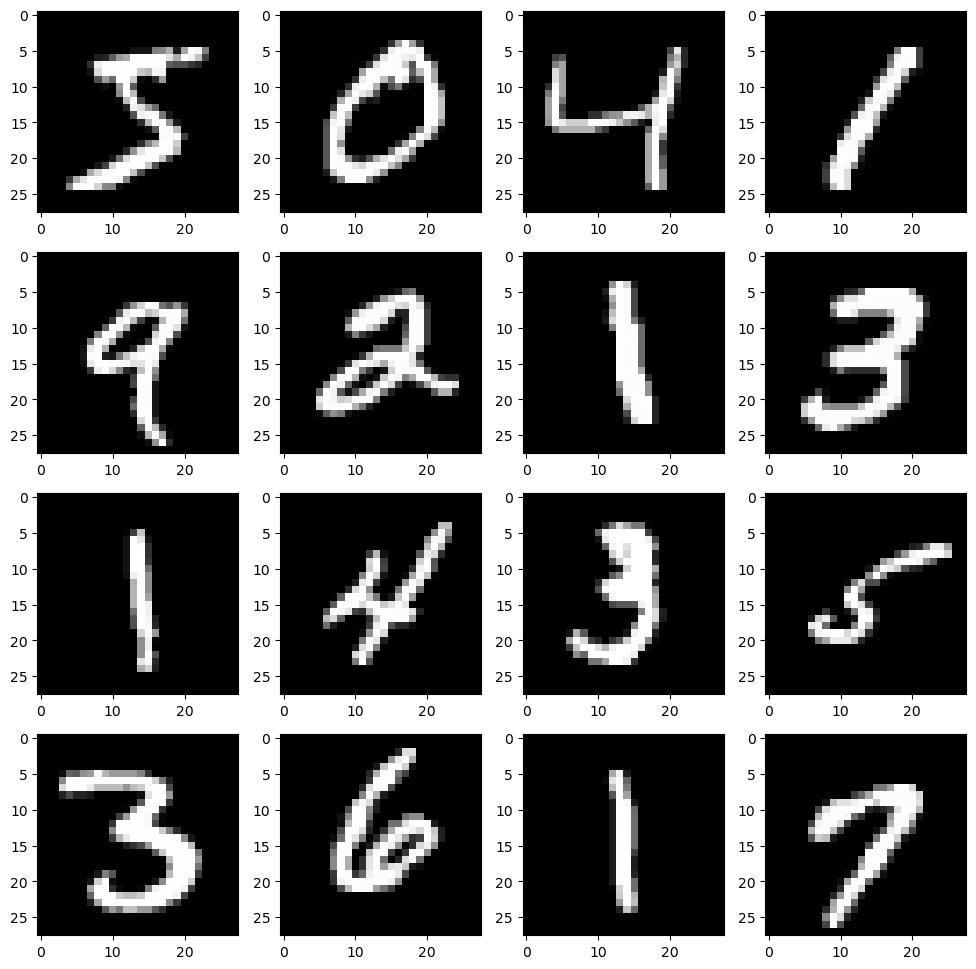

In [5]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize=(12, 12))

a =0 
for i in range(4):
    for j in range(4):
        axes[i,j].imshow(X_train[a], cmap='gray')
         
        a += 1 
                 
    
plt.show() 
        

Step 4 :- Data preprocessing 

In this step we transforms the raw data into a suitable format for training a machine learning model, including tasks like reshaping images, normalizing values, and splitting data into training and validation sets.

In [6]:
X_valid, X_train = X_train[:6000] / 255, X_train[6000:]/255
y_valid, y_train = y_train[:6000], y_train[6000:]
X_test = X_test/255

In [7]:

class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [8]:
class_names[y_train[12]]

'2'

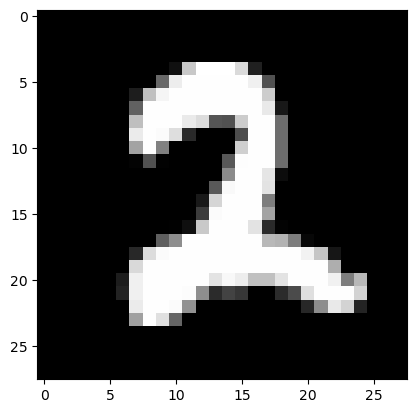

In [9]:
plt.imshow(X_train[12], cmap=plt.get_cmap('gray'))

In [10]:

model = keras.models.Sequential()

# any layers to the model
model.add(keras.layers.Flatten(input_shape=(28, 28)))  # Input layer
model.add(keras.layers.Dense(300, activation="relu"))  # Hidden layer
model.add(keras.layers.Dense(100, activation="relu"))  # Hidden layer
model.add(keras.layers.Dense(10, activation="softmax"))  # Output layer


2023-08-18 22:33:08.133253: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 22:33:08.134146: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:

model.summary() , model.layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


(None,
  <keras.layers.core.dense.Dense at 0x7f49da7e4550>])

In [12]:
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/#available-optimizers
# https://keras.io/api/metrics/


# compiling the model 
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [13]:

# training the model using model.fit method

history = model.fit(X_train, y_train, epochs=34, validation_data = (X_valid, y_valid), batch_size=32) 


Epoch 1/34
1688/1688 [==============================] - 27s 15ms/step - loss: 0.6010 - accuracy: 0.8444 - val_loss: 0.3057 - val_accuracy: 0.9160
Epoch 2/34
1688/1688 [==============================] - 23s 14ms/step - loss: 0.2877 - accuracy: 0.9175 - val_loss: 0.2390 - val_accuracy: 0.9325
Epoch 3/34
1688/1688 [==============================] - 24s 14ms/step - loss: 0.2342 - accuracy: 0.9334 - val_loss: 0.2067 - val_accuracy: 0.9422
Epoch 4/34
1688/1688 [==============================] - 25s 15ms/step - loss: 0.1982 - accuracy: 0.9444 - val_loss: 0.1766 - val_accuracy: 0.9523
Epoch 5/34
1688/1688 [==============================] - 26s 15ms/step - loss: 0.1718 - accuracy: 0.9514 - val_loss: 0.1603 - val_accuracy: 0.9557
Epoch 6/34
1688/1688 [==============================] - 26s 15ms/step - loss: 0.1524 - accuracy: 0.9562 - val_loss: 0.1444 - val_accuracy: 0.9617
Epoch 7/34
1688/1688 [==============================] - 26s 15ms/step - loss: 0.1360 - accuracy: 0.9614 - val_loss: 0.1331 -

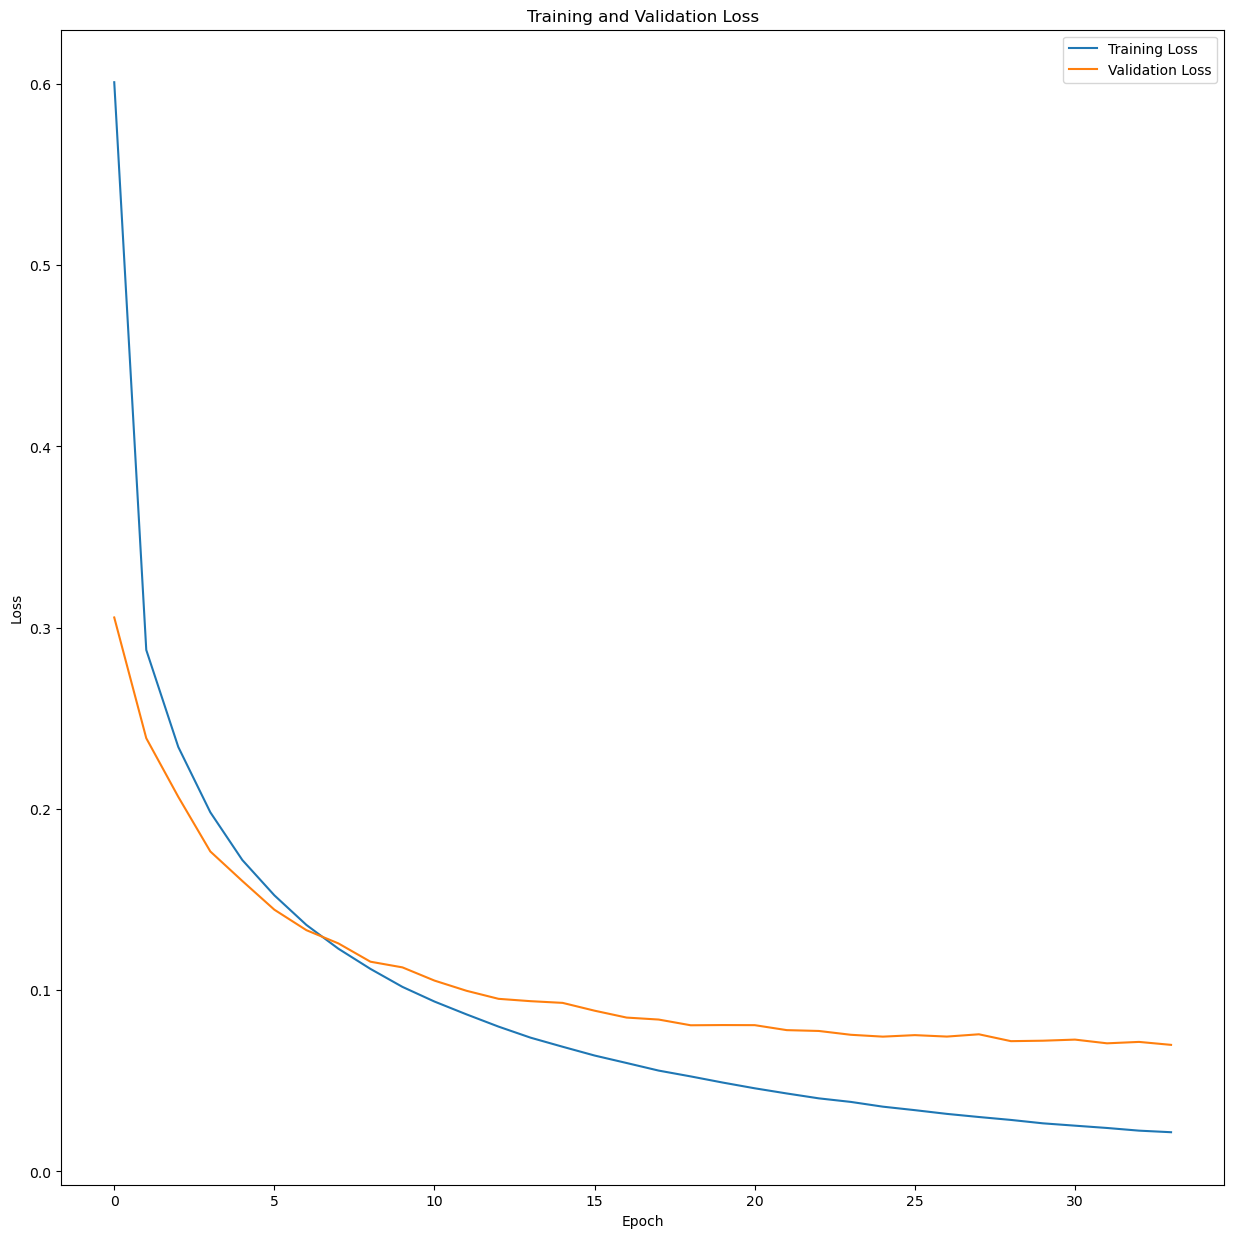

In [14]:

# Plot training and validation loss
plt.figure(figsize=(15, 15))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

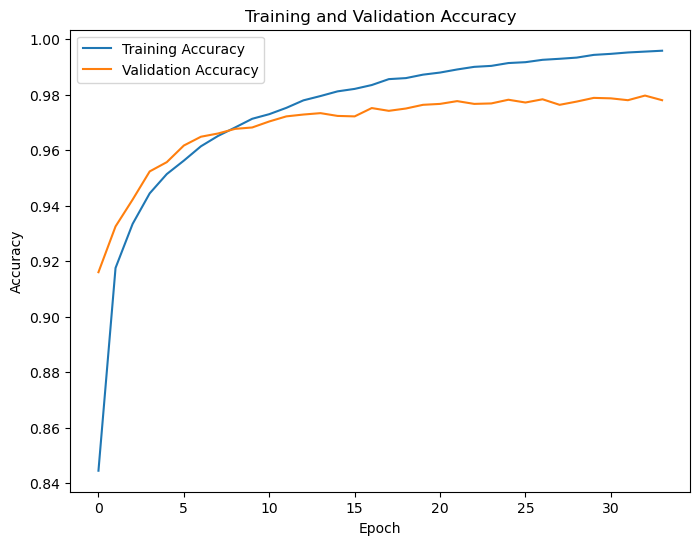

In [15]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [16]:

model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0690 - accuracy: 0.9774


[0.06900254637002945, 0.977400004863739]

In [35]:
predictions = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [36]:
predicted_numbers = np.argmax(predictions, axis=1)

In [37]:
predicted_numbers.reshape(-1,1).shape

(10000, 1)